# Функция правдоподобия

In [176]:
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm, uniform
from functools import reduce
import numpy as np
import matplotlib
matplotlib.rc('font', size=22)
matplotlib.rc('animation', html='html5')
bigfontsize=20
labelfontsize=16
tickfontsize=16
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })




## Доверительные интервалы

Допустим что наша выборка состоит всего из одного значения $a$ случайной величины сгенерированого из нормального распределения $\mathcal{N}(3, 1)$.

Также допустим что мы знаем что эта случайная величина сгенерирована из нормального распределения с шириной 1 и неизвестным средним. Функция правдоподобия для среднего значения будет иметь вид

$$\mathcal{L}(\mu) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(\mu-a)^2}{2}} $$

(мы подставили известное значение выборки $x=a$ и известную ширину $\sigma = 1$)

Соответственно, отрицательный логарфм функции правдоподобия:

$$-\log\mathcal{L}(\mu) = \frac{(\mu-a)^2}{2} + const $$


Text(0, 0.5, '$-\\Delta log \\mathcal{L}$')

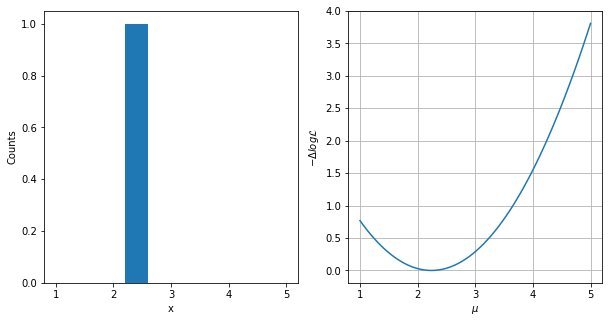

In [128]:
# Samplinng random value
a = norm(3,1).rvs(1)

# Defining plottin axis
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# Plotting variable
axs[0].hist(a, bins = 10, range = [1, 5])

# Plotting NLL
## Setting grid of x values
x = np.linspace(1, 5, 100)
axs[0].set_ylabel("Counts")
axs[0].set_xlabel("x")

## Calculating negative log likelihood
y = [-np.log(norm(i, 1).pdf(a)) for i in x]
## Subtracting minimum of the NLL 
y = y - min(y)

axs[1].plot(x,y)
axs[1].grid(True)
axs[1].set_xlabel("$\mu$")
axs[1].set_ylabel("$-\Delta log \mathcal{L}$")

Минимум NLL находится в точке $\mu = a$ - как и следовало ожидать.
Давайте рассмотрим как будут выглядить распределения плотности вероятности для нескольких значений $\mu$ и оценим насколько правдоподобно полученной значение случайной величины.

Text(0, 0.5, '$-\\Delta log \\mathcal{L}$')

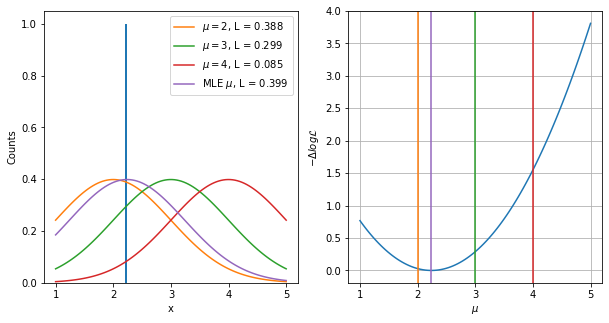

In [129]:
# Getting grid on x
x_val = np.linspace(1, 5, 100)
pdf_2 = norm(2, 1) # PDF for mu = 2
pdf_3 = norm(3, 1) # PDF for mu = 3
pdf_4 = norm(4, 1) # PDF for mu = 4
pdf_a = norm(a[0], 1) # PDF for mu at MLE

# Defining plottin axis
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# Plotting variable
axs[0].hist(a, bins = 100, range = [1, 5])
axs[0].plot(x_val, pdf_2.pdf(x_val), label = "$\mu = 2$, L = {:.3f}".format(pdf_2.pdf(a[0])))
axs[0].plot(x_val, pdf_3.pdf(x_val), label = "$\mu = 3$, L = {:.3f}".format(pdf_3.pdf(a[0])))
axs[0].plot(x_val, pdf_4.pdf(x_val), label = "$\mu = 4$, L = {:.3f}".format(pdf_4.pdf(a[0])))
axs[0].plot(x_val, pdf_a.pdf(x_val), label = "MLE $\mu$, L = {:.3f}".format(pdf_a.pdf(a[0])))
axs[0].legend()

# Plotting NLL
## Setting grid of x values
x = np.linspace(1, 5, 100)
axs[0].set_ylabel("Counts")
axs[0].set_xlabel("x")

## Calculating negative log likelihood
y = [-np.log(norm(i, 1).pdf(a)) for i in x]
## Subtracting minimum of the NLL 
y = y - min(y)

axs[1].plot(x,y)
axs[1].axvline(2, color = "tab:orange")
axs[1].axvline(3, color = "tab:green")
axs[1].axvline(4, color = "tab:red")
axs[1].axvline(a[0], color = "tab:purple")
axs[1].grid(True)
axs[1].set_xlabel("$\mu$")
axs[1].set_ylabel("$-\Delta log \mathcal{L}$")

Для наглядности, заменим NLL на непосредственно функцию правдоподобия.

Text(0, 0.5, '$\\mathcal{L}$')

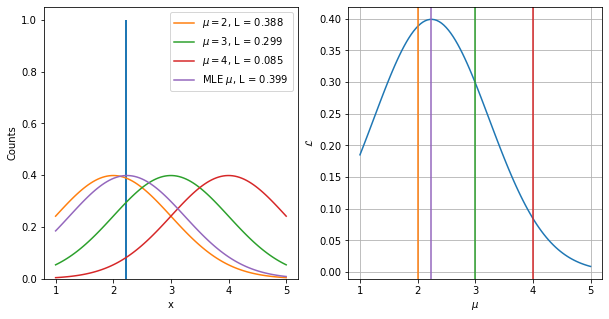

In [131]:
# Getting grid on x
x_val = np.linspace(1, 5, 100)
pdf_2 = norm(2, 1) # PDF for mu = 2
pdf_3 = norm(3, 1) # PDF for mu = 3
pdf_4 = norm(4, 1) # PDF for mu = 4
pdf_a = norm(a[0], 1) # PDF for mu at MLE

# Defining plottin axis
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# Plotting variable
axs[0].hist(a, bins = 100, range = [1, 5])
axs[0].plot(x_val, pdf_2.pdf(x_val), label = "$\mu = 2$, L = {:.3f}".format(pdf_2.pdf(a[0])))
axs[0].plot(x_val, pdf_3.pdf(x_val), label = "$\mu = 3$, L = {:.3f}".format(pdf_3.pdf(a[0])))
axs[0].plot(x_val, pdf_4.pdf(x_val), label = "$\mu = 4$, L = {:.3f}".format(pdf_4.pdf(a[0])))
axs[0].plot(x_val, pdf_a.pdf(x_val), label = "MLE $\mu$, L = {:.3f}".format(pdf_a.pdf(a[0])))
axs[0].legend()

# Plotting NLL
## Setting grid of x values
x = np.linspace(1, 5, 100)
axs[0].set_ylabel("Counts")
axs[0].set_xlabel("x")

## Calculating negative log likelihood
y = [norm(i, 1).pdf(a) for i in x]

axs[1].plot(x,y)
axs[1].axvline(2, color = "tab:orange")
axs[1].axvline(3, color = "tab:green")
axs[1].axvline(4, color = "tab:red")
axs[1].axvline(a[0], color = "tab:purple")
axs[1].grid(True)
axs[1].set_xlabel("$\mu$")
axs[1].set_ylabel("$\mathcal{L}$")

Пусть теперь наша выборка состоит более чем из одного значения. Давайте посмотрим на функцию правдоподобия в этом случае.

Text(0, 0.5, '$-\\Delta log \\mathcal{L}$')

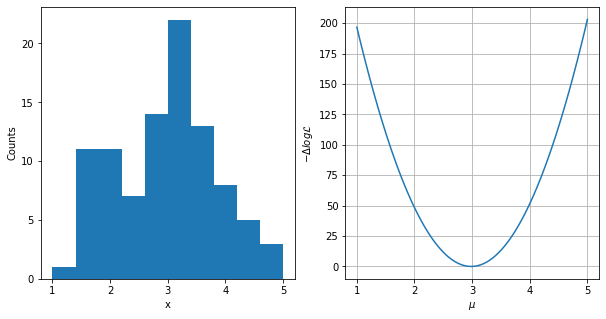

In [132]:
# Samplinng random value
a = norm(3,1).rvs(100)

# Defining plottin axis
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# Plotting variable
axs[0].hist(a, bins = 10, range = [1, 5])

# Plotting NLL
## Setting grid of x values
x = np.linspace(1, 5, 100)
axs[0].set_ylabel("Counts")
axs[0].set_xlabel("x")

## Calculating negative log likelihood
y = [-np.sum(np.log(norm(i, 1).pdf(a))) for i in x]
## Subtracting minimum of the NLL 
y = y - min(y)

axs[1].plot(x,y)
axs[1].grid(True)
axs[1].set_xlabel("$\mu$")
axs[1].set_ylabel("$-\Delta log \mathcal{L}$")

Обратите внимание на то что масштаб оси $y$ на правом графике изменился. Чтобы сделать это более явным, давайте посмотрим на функции правдоподобия полученные на разных размерах выборки

Text(0, 0.5, '$-\\Delta log \\mathcal{L}$')

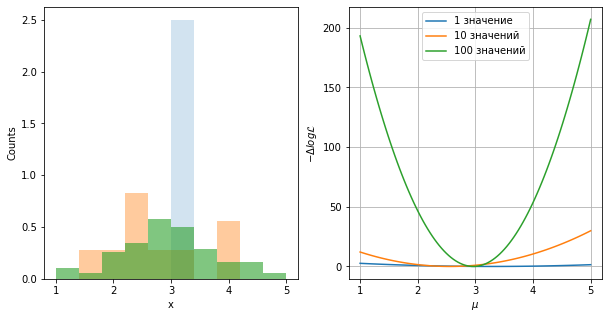

In [133]:
# Samplinng random value
a = norm(3,1).rvs(1000)

# Defining plottin axis
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# Plotting variable
axs[0].hist(a[:1], bins = 10, range = [1, 5], density = True, label = "1 значение", alpha = 0.2)
axs[0].hist(a[:10], bins = 10, range = [1, 5], density = True, label = "10 значений", alpha = 0.4)
axs[0].hist(a[:100], bins = 10, range = [1, 5], density = True, label = "100 значений", alpha = 0.6)

# Plotting NLL
## Setting grid of x values
x = np.linspace(1, 5, 100)
axs[0].set_ylabel("Counts")
axs[0].set_xlabel("x")

## Calculating negative log likelihood
### for 1 event
y_1 = [-np.sum(np.log(norm(i, 1).pdf(a[:1]))) for i in x]
y_1 = y_1 - min(y_1)

### for 10 events
y_10 = [-np.sum(np.log(norm(i, 1).pdf(a[:10]))) for i in x]
y_10 = y_10 - min(y_10)

### for 100 events
y_100 = [-np.sum(np.log(norm(i, 1).pdf(a[:100]))) for i in x]
y_100 = y_100 - min(y_100)

axs[1].plot(x,y_1, label = "1 значение")
axs[1].plot(x,y_10, label = "10 значений")
axs[1].plot(x,y_100, label = "100 значений")
axs[1].legend()
axs[1].grid(True)
axs[1].set_xlabel("$\mu$")
axs[1].set_ylabel("$-\Delta log \mathcal{L}$")

С ростом числа событий функция правдоподобия становится все более крутой. __Правдоподобие набора данных убывает при удалении параметра от MLE тем быстрее, чем больше данных в нашей выборке.__

##  Случай нескольких параметров

В предыдущем примере мы фиксировали один из параметров модели - $\sigma = 1$. Но в общем случае модель может содержать несколько параметров. Соответственно, функция правдоподобия будет функцией от нескольких переменных.

Рассмотрим предыдущий пример, но в этот раз мы оставим параметр $\sigma$ нашей модели так же свободным.

In [208]:
# Samplinng random value
a = norm(3,1).rvs(100)


# Function to caltculate NLL
def nll_func(mu, sigma, d):
    return -np.sum(np.log(norm(mu, sigma).pdf(d)))

# Setting grid of x values
mus = np.linspace(2, 4, 101)
sigmas = np.linspace(0.7, 1.5, 101)

# Building NLL
nll = np.zeros((101,101))

for i,mu in enumerate(mus):
    for j,sigma in enumerate(sigmas):
        nll[j,i] = nll_func(mu, sigma, a)

nll = nll - np.min(nll)


In [216]:
pos_max = np.where(nll == np.min(nll))
mle_mu = mus[pos_max[1]]
mle_sigma = sigmas[pos_max[0]]

Text(0, 0.5, '$-\\Delta log \\mathcal{L}$')

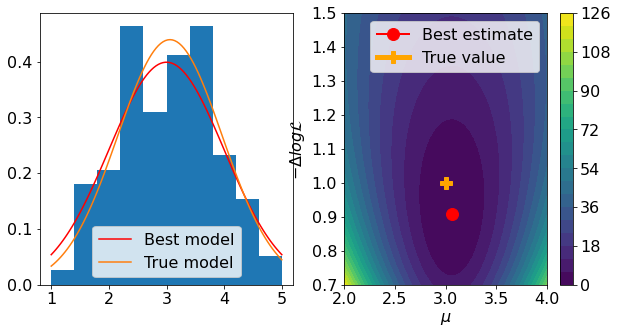

In [217]:
# Defining plottin axis
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# Plotting variable
axs[0].hist(a, bins = 10, range = [1, 5], density = True)
x = np.linspace(1, 5, 100)
axs[0].plot(x, norm(3,1).pdf(x),'r',label = 'Best model')
axs[0].plot(x, norm(mle_mu,mle_sigma).pdf(x),'-',label = 'True model')
axs[0].legend()

# Plotting likelihood
lscan = axs[1].contourf(mus, sigmas,nll, levels = 20)
# Plotting MLE estimate
axs[1].plot(mle_mu,
            mle_sigma,
            '-ro', linewidth=2, markersize=12, label = "Best estimate")
axs[1].plot(3,
            1,
            '-P', color = "orange", linewidth=5, markersize=12, label = "True value")
fig.colorbar(lscan, ax=axs[1])
axs[1].legend()
axs[1].set_xlabel("$\mu$")
axs[1].set_ylabel("$-\Delta log \mathcal{L}$")

## Маргинализация параметров

В случае если нам не интересны функции правдоподобия всех параметров, мы можем маргинализовать (проинтегрировать) ненужные параметры:

$$ p(\theta_1|\mathcal{D}) = \int p(\theta_1,\theta_2|\mathcal{D}) d \theta_2 $$

Допустим, что в предыдущем примере нам интересна только функция правдоподобия ширины распределения из предыдущего примера. Маргинализуем параметр $\mu$

In [234]:
nll = nll.T

In [235]:
dsigma = (sigmas.max()-sigmas.min())/len(sigmas)
nll_mu = np.zeros((101))
for i,mu in enumerate(mus):
    likelihood = np.sum(np.exp(-nll[i]))*dsigma
    nll_mu[i] = -np.log(likelihood)

nll_mu = nll_mu - min(nll_mu )

Сравним полученную функцию правдоподобия со сканом двумерной функции правдоподобия с параметром $\sigma$ зафиксированным в максимумею

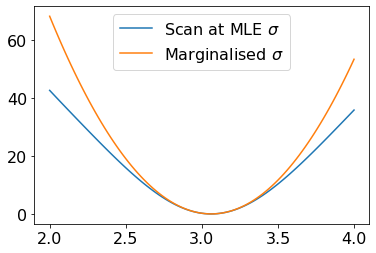

In [239]:
plt.plot(mus, nll_mu, label = "Scan at MLE $\sigma$")
plt.plot(mus, nll.T[pos_max[0]][0], label = "Marginalised $\sigma$")
plt.legend()

## Метод моментов

Помимо минимизации NLL, можно использовать метод моментов: мы находим моменты выборки и приравниваем их к моментам распределения. Из полученных уравнений мы находим параметры распределения. 
Для некоторых распределений (гауссиана) это работает, а для некоторых - нет.

Рассмотрим метод моментов примененный к равномерному распределению:
$$ p(y|\theta) = \frac{1}{\theta_2-\theta_1}I(\theta_1\leq y\leq \theta_2) $$

Первые два момента распределения записыаются как:
$$\mu_1 = \frac{1}{2}(\theta_1+\theta_2)$$
$$\mu_1 = \frac{1}{3}(\theta_1^2+\theta_1\theta_2+\theta_2^2)$$

Отсюда:
$$\theta_1 = \mu_1-\sqrt{3(\mu_2-\mu_1^2)}$$
$$\theta_2 = \mu_1+\sqrt{3(\mu_2-\mu_1^2)}$$

Давайте определим функции для определения этих параметров из мометов:


In [142]:
def theta_1(mu_1, mu_2):
    return mu_1 - np.sqrt(3*(mu_2-mu_1**2))

def theta_2(mu_1, mu_2):
    return mu_1 + np.sqrt(3*(mu_2-mu_1**2))

Рассмотрим случайную выборку из равномерного распределения и оценим моменты.

In [162]:
vals[vals<theta_1(mu_1, mu_2)]

array([0.09168002])

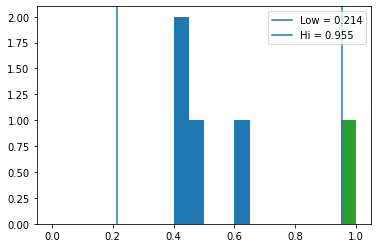

In [166]:
# vals = np.array([0, 0, 0, 0, 1])
vals = uniform(0, 1).rvs(5)
mu_1 = np.mean(vals)
mu_2 = np.mean(vals**2)

plt.hist(vals, range = [0, 1], bins = 20)
plt.hist(vals[vals<theta_1(mu_1, mu_2)], range = [0, 1], bins = 20)
plt.hist(vals[vals>theta_2(mu_1, mu_2)], range = [0, 1], bins = 20)
plt.axvline(theta_1(mu_1, mu_2), label = "Low = {:.3f}".format(theta_1(mu_1, mu_2)))
plt.axvline(theta_2(mu_1, mu_2), label = "Hi = {:.3f}".format(theta_2(mu_1, mu_2)))
plt.legend()

При оценке методом моентов может сложиться ситуация при которой существующие данные не могли бы быть произведены из данного распределения. В то же время мтожно показать, что оценка методом наибольшего правдоподобия дает минимальные и максимальные значения выборки как границы модели.

## Регуляризация

Оценка методом наибольшего правдоподобия позволяет найти модель которая наилучшим образом опиывает данные. Но такая модель не всегда оптимальна.

Рассмотрим выборку из распределения Бернулли

Посмотрим как будет меняться оценка вероятности положительного исхода методом максимального прадоподобия.

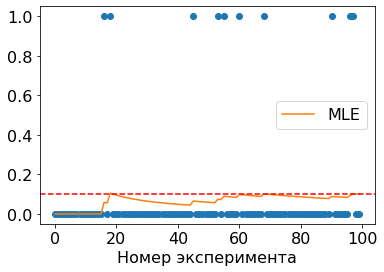

In [184]:
from scipy.stats import bernoulli
p_true = 0.1
x = bernoulli(p_true).rvs(100)

MLE = [np.mean(x[:i+1]) for i, j in enumerate(x)]

plt.plot(np.arange(0, 100),x,"o")
plt.plot(np.arange(0, 100),MLE,label = "MLE")
plt.axhline(p_true, ls = '--',c = 'r')
plt.xlabel("Номер эксперимента")
plt.legend()

С течением времени оценка приближается к истинному значению, но сначала она принимет экстремальное значение и не меняется до тех пор пока не появится хотя бы одно положительное значение.
Интуитивно, мы бы ожидали что оценка будет меняться с каждым новым измерением.
В данном случае мы можем улучшить поведение модели добавив небольшое число к числителю и знаменателю модели.

In [187]:
MAP = [(x[:i+1].sum()+1)/(i+1+2)  for i, j in enumerate(x)]

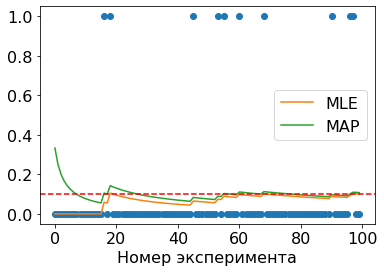

In [188]:
plt.plot(np.arange(0, 100),x,"o")
plt.plot(np.arange(0, 100),MLE,label = "MLE")
plt.plot(np.arange(0, 100),MAP,label = "MAP")
plt.axhline(p_true, ls = '--',c = 'r')
plt.xlabel("Номер эксперимента")
plt.legend()

Оценка MPF дает лучший результат в начале и сходится к MLE с набором данных.

## Апостериорная вероятность

Итак, функция правдоподобия описывает вероятность получить наши значения выборки $\mathcal{D}$ при условии того что модель задается какими-то параметрами $\theta$:

$$ \mathcal{L}(\mathcal{D}|\theta) $$

Используя формулу Байеса, можно преобразовать функцию правдоподобия в функцию плотности вероятности значений модели при условии наблюдения нашего набора данных:

$$p(\theta|\mathcal{D}) = \frac{\mathcal{L}(\mathcal{D}|\theta)p(\theta)}{p(\mathcal{D})}\equiv  \frac{\mathcal{L}(\mathcal{D}|\theta)p(\theta)}{\int p(\theta^\prime)\mathcal{L}(\mathcal{D}|\theta^\prime)d\theta^\prime}$$

$p(\theta)$ называется априроным распределением и отражает наши представления о параметре до начала измерений, а $\int p(\theta^\prime)\mathcal{L}(\mathcal{D}|\theta^\prime)d\theta^\prime$ назыается маргинальной функцие правдоподобия и по сути яваляется нормировкой. Вероятность $p(\theta|\mathcal{D})$ называется апостериорной вероятностью.

Максимизация апостериорной вероятности дает оценку параметров с учетом априорного знания - в отличие от наибольшего правдоподобия.

Как и функция правдоподобия, априорная вероятность максимизируется через минимизацию отрицательного логарифма:
    
$$ - \log p(\theta|\mathcal{D}) = -\log\mathcal{L}(\mathcal{D}|\theta)-\log p(\theta)+\log p(\mathcal{D}) \equiv  -\log\mathcal{L}(\mathcal{D}|\theta)-\log p(\theta)+C$$

Разница с NLL заключается в дополнительном слагаемом $-\log p(\mathcal{D})$ и константе

Вернемся к распределению Бернулли из предыдущего примера. Можно показать, что выбранная регуляризация  превращает оценку максимального правдоподобия в оценку максимумальной апостерироной вероятности с априорным бета распределением параметра $p$: $\mathcal{B}(2,2)$